# Intro

In this optional assignment, a set of regression models are trained based on the provided dataset e01_data.py, consisting on 500 one-dimensional features in the range (-1,1) which are mapped to an output in the approximate range (-4,8). The data is first loaded and represented, then we split the data into the training, validation and test sets. As the values of the features are already scaled to the [-1,1] interval, no additional scaling is needed. The feature vector can be expanded to polynomial features and different version are tested (no polynomial fit, degree 2, degree 5 and degree 7), their results analyzed, in order to choose the model which best fits the data. The following models are trained:


1.   Linear regressor
2.   Lasso regressor
3.   Ridge regressor
4.   HUBER regressor
5.   RANSAC regressor
6.   K-NN

All the models are trained with cross-validation (k=10 folds) in order to get more accurate results in the validation stage. In the case of Lasso and Ridge regressors a hyperparameter search is conducted to find the best values for the regularization parameter. The same technique is used in the case of K-NN to find the best number of neighbours among a set of predefined values.

Instead of using a single metric during cross-validation with cross_val_score, the function cross_validate is used to measure both the R2 cost and the negative MSE. The metrics for every experiment with the chosen hyperparameters are presented in a Table below, then analyzed.

Saving e01_data.npy to e01_data (8).npy
(500, 1)
(500, 1)


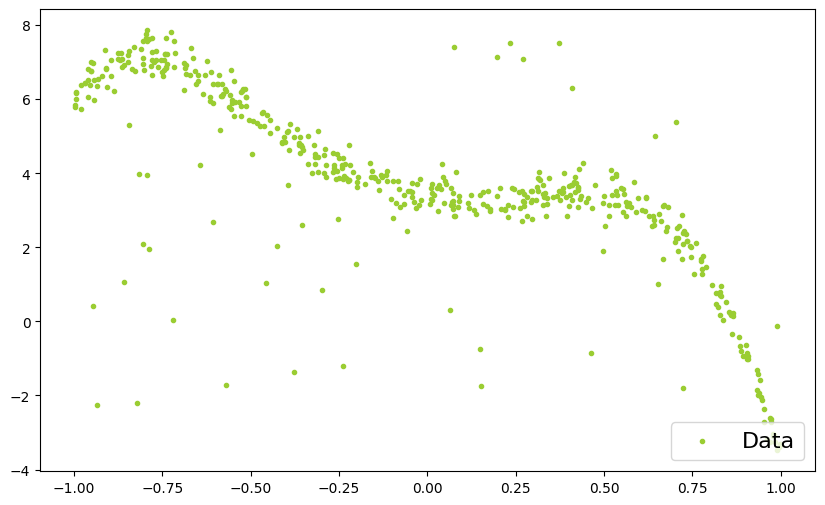

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

# Upload the file
uploaded = files.upload()

# Load the data from the file
X, y = np.load('e01_data.npy')

# Make sure the data is there
print(X.shape)
print(y.shape)
plt.scatter(X, y, color='yellowgreen', marker='.',label='Data')
plt.legend(loc='lower right')

In [ ]:
# Do your machine learning here...

max_degree = 5
# SMALL NOTE: To expand the input vector to polynomial features, e.g. of degree 2, do:
poly = PolynomialFeatures(max_degree)
X = poly.fit_transform(X)


SPLIT NORMALIZED DATA

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

# Validation data set
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, y, test_size = 0.1, random_state=5)

# Test data set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.1, random_state=5)

print('Training Data size: ', X_train.shape)
print('Training Output size: ', Y_train.shape)
print('Validation Data size: ', X_val.shape)
print('Validation Output size: ', Y_val.shape)
print('Test Data size: ', X_test.shape)
print('Test Output size: ', Y_test.shape)

Training Data size:  (405, 6)
Training Output size:  (405, 1)
Validation Data size:  (45, 6)
Validation Output size:  (45, 1)
Test Data size:  (50, 6)
Test Output size:  (50, 1)


# Models

## Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score # more metrics available at
#https://scikit-learn.org/stable/modules/model_evaluation.html

# Fit a linear regression model
lr = linear_model.LinearRegression()
cv_scores_lr = cross_validate(lr, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))

print('R2 score, k-fold cross validation, linear regression: {}'.format(np.mean(cv_scores_lr['test_r2'])))
print('R2 scores for all folds: {}'.format(cv_scores_lr['test_r2']))

print('Neg MSE score, k-fold cross validation, linear regression: {}'.format(np.mean(cv_scores_lr['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_lr['test_neg_mean_squared_error']))

R2 score, k-fold cross validation, linear regression: 0.7519627722378148
R2 scores for all folds: [0.77013168 0.89860264 0.75099598 0.44515866 0.7871172  0.77838896
 0.95863338 0.94232361 0.50886515 0.67941048]
Neg MSE score, k-fold cross validation, linear regression: -1.6423044391425776
Neg MSE scores for all folds: [-1.5302071  -0.37342489 -1.4707972  -4.03521494 -1.49999475 -1.75147236
 -0.20212718 -0.1903937  -3.07183495 -2.29757733]


## LASSO regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tune hyperparameters
lasso_model = linear_model.Lasso()
parameters_lasso = {'alpha':[0.001, 0.005, 0.1, 0.5, 0.75, 1]}
lasso_hyp = GridSearchCV(lasso_model, parameters_lasso)
lasso_result = lasso_hyp.fit(X_train_and_val, Y_train_and_val)
cv_scores_lasso = cross_validate(lasso_result, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))


print('R2 score, k-fold cross validation, lasso: {}'.format(np.mean(cv_scores_lasso['test_r2'])))
print('R2 Scores for all folds: {}'.format(cv_scores_lasso['test_r2']))
print('Neg MSE score, k-fold cross validation, lasso: {}'.format(np.mean(cv_scores_lasso['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_lasso['test_neg_mean_squared_error']))

print('Best parameters set found on development set: {}\n'.format(lasso_result.best_params_))

R2 score, k-fold cross validation, lasso: 0.7524674596465265
R2 Scores for all folds: [0.76881384 0.90345396 0.74955043 0.45740826 0.78886079 0.77564129
 0.95588452 0.94050512 0.50548106 0.67907533]
Neg MSE score, k-fold cross validation, lasso: -1.6385833811389428
Neg MSE scores for all folds: [-1.53897979 -0.35555849 -1.47933566 -3.94612679 -1.48770924 -1.77318826
 -0.21555874 -0.19639665 -3.09300094 -2.29997926]
Best parameters set found on development set: {'alpha': 0.001}



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Tune hyperparameters
nn_model = KNeighborsRegressor()
parameters_knn = {'n_neighbors':[1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
knn_hyp = GridSearchCV(nn_model, parameters_knn)
knn_result = knn_hyp.fit(X_train_and_val, Y_train_and_val)
cv_scores_knn = cross_validate(knn_result, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))

print('R2 score, k-fold cross validation, knn: {}'.format(np.mean(cv_scores_knn['test_r2'])))
print('R2 Scores for all folds: {}'.format(cv_scores_knn['test_r2']))
print('Neg MSE score, k-fold cross validation, knn: {}'.format(np.mean(cv_scores_knn['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_knn['test_neg_mean_squared_error']))
print('Best parameters set found on development set: {}\n'.format(knn_result.best_params_))


R2 score, k-fold cross validation, knn: 0.740902682289205
R2 Scores for all folds: [0.7408581  0.89158944 0.74555513 0.41179445 0.78953104 0.76969703
 0.95336652 0.9217805  0.50939566 0.67545896]
Neg MSE score, k-fold cross validation, knn: -1.7088767976275243
Neg MSE scores for all folds: [-1.72507795 -0.39925302 -1.50293477 -4.27786404 -1.48298655 -1.82016784
 -0.22786231 -0.25820792 -3.06851682 -2.32589675]
Best parameters set found on development set: {'n_neighbors': 15}



## Ridge Regressor

In [ ]:
ridge_model = linear_model.Ridge()
parameters_ridge = {'alpha':[0.001, 0.005, 0.1, 0.25, 0.5, 0.75, 1]}
ridge_hyp = GridSearchCV(ridge_model, parameters_ridge)
ridge_result = ridge_hyp.fit(X_train_and_val, Y_train_and_val)
cv_scores_ridge = cross_validate(knn_result, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))

print('R2 score, k-fold cross validation, ridge: {}'.format(np.mean(cv_scores_ridge['test_r2'])))
print('R2 Scores for all folds: {}'.format(cv_scores_ridge['test_r2']))
print('Neg MSE score, k-fold cross validation, ridge: {}'.format(np.mean(cv_scores_ridge['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_ridge['test_neg_mean_squared_error']))
print('Best parameters set found on development set: {}\n'.format(ridge_result.best_params_))

R2 score, k-fold cross validation, ridge: 0.740902682289205
R2 Scores for all folds: [0.7408581  0.89158944 0.74555513 0.41179445 0.78953104 0.76969703
 0.95336652 0.9217805  0.50939566 0.67545896]
Neg MSE score, k-fold cross validation, ridge: -1.7088767976275243
Neg MSE scores for all folds: [-1.72507795 -0.39925302 -1.50293477 -4.27786404 -1.48298655 -1.82016784
 -0.22786231 -0.25820792 -3.06851682 -2.32589675]
Best parameters set found on development set: {'alpha': 0.005}



## HUBER Regressor

In [ ]:
# Fit a Huber model
huber = linear_model.HuberRegressor()
cv_scores_huber = cross_validate(huber, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))

print('R2 score, k-fold cross validation, huber: {}'.format(np.mean(cv_scores_huber['test_r2'])))
print('R2 Scores for all folds: {}'.format(cv_scores_huber['test_r2']))
print('Neg MSE score, k-fold cross validation, huber: {}'.format(np.mean(cv_scores_huber['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_huber['test_neg_mean_squared_error']))

R2 score, k-fold cross validation, huber: 0.7515493830239964
R2 Scores for all folds: [0.76078699 0.89724601 0.77751645 0.41817053 0.79583959 0.76471152
 0.97852807 0.9696106  0.48543375 0.66765032]
Neg MSE score, k-fold cross validation, huber: -1.6620063096324766
Neg MSE scores for all folds: [-1.5924136  -0.37842105 -1.3141482  -4.23149247 -1.43853587 -1.85957016
 -0.10491695 -0.10031749 -3.21838815 -2.38185916]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## RANSAC regressor

In [ ]:
# Fit a RANSAC model
ransac = linear_model.RANSACRegressor()
cv_scores_ransac = cross_validate(ransac, X_train_and_val, Y_train_and_val, cv=10, scoring = ('r2', 'neg_mean_squared_error'))
print('R2 score, k-fold cross validation, RANSAC: {}'.format(np.mean(cv_scores_ransac['test_r2'])))
print('R2 Scores for all folds: {}'.format(cv_scores_ransac['test_r2']))
print('Neg MSE score, k-fold cross validation, RANSAC: {}'.format(np.mean(cv_scores_ransac['test_neg_mean_squared_error'])))
print('Neg MSE scores for all folds: {}'.format(cv_scores_ransac['test_neg_mean_squared_error']))

R2 score, k-fold cross validation, RANSAC: 0.7479641729963927
R2 Scores for all folds: [0.76008818 0.89240009 0.77806866 0.41495828 0.7947672  0.7623878
 0.96993389 0.96825209 0.47638318 0.66240237]
Neg MSE score, k-fold cross validation, RANSAC: -1.682927877511068
Neg MSE scores for all folds: [-1.59706551 -0.39626755 -1.31088642 -4.25485435 -1.44609207 -1.87793536
 -0.14691019 -0.10480201 -3.27499554 -2.41946978]


# Training and validation results

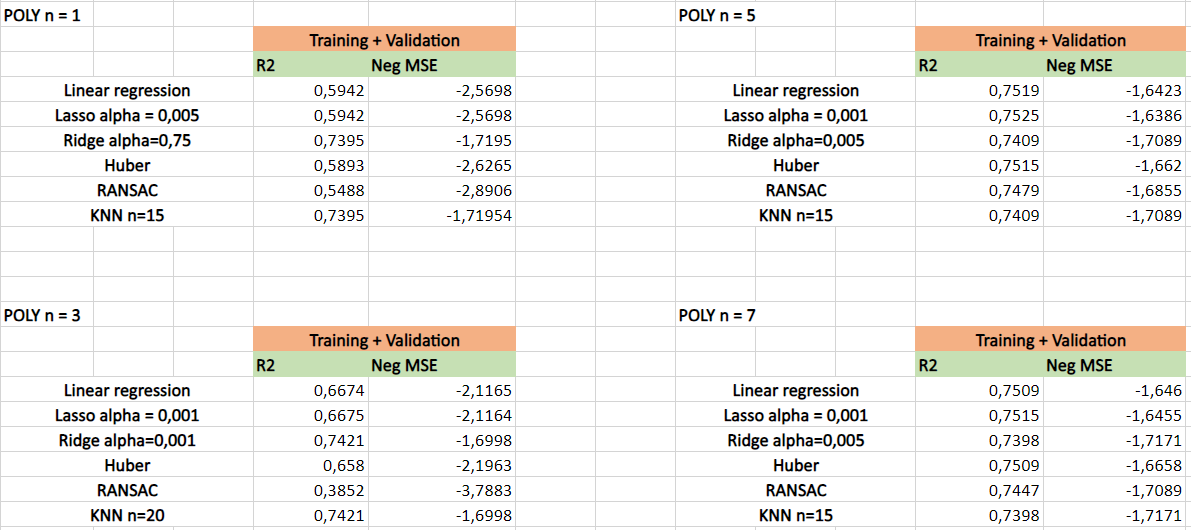

In the Table above, the results of cross-validation for the training stage are presented for each model that was tested. The R2 and MSE values presented correspond to the mean value of the scores across all 10 folds.

The R2 metric gives us an intuition of the proportion of variance in y explained by the variables of the model. The closer this value is to 1, the better the model fits the data and accounts for the variability in the validation set.

On the other hand, the negative MSE, although highly influenced by big errors, gives us an intuition of the average error of the model as the (positive) square root of the values presented. In this case, the output can be between -4 and 8, and the average error is in most cases below sqrt(2) = 1.41, which can be considered acceptable.

Firstly, it can be seen how the polynomial fit of the feature vector is an accurate choice for this data set, as all models that were tested without altering the original features produce generally poor results, with the exception of KNN for n=15 neighbors. The performance of KNN is consistent across all experiments as it is not affected by the polynomial fit of the feature vector.

As we increase the degree of the polynomial fit, both metrics improve significantly for most of the models. However, for n>5 it was observed that the values remained the same with the additional computational cost which made the training slower. For this reason, we stay with n=5 as a good compromise.

Although every model offers similar results in validation the Lasso regressors, with a very small regularization coefficient of 0,001, have consistently shown a slightly better result with a better balance of R2 and MSE values, with R2 = 0,7525 and Neg MSE=-1,6386. The Lasso regressor uses L1 regularization and assumes a Laplacian distribution for the weights. It can perform feature selection by assigning zero values to some coefficients. The result is a model that is robust to the presence of outliers, which are highly present in this particular dataset, and focuses on the relevant part of the data.

However it can be seen that there is a small difference with other models, particularly the basic Linear regressor and the Huber regressor. KNN also offers decent enough results for this particular dataset. Even though we stick with Lasso for the test stage, most of these models should perform similarly given that the polynomial fit is performed.

# Test

In the final part of the assignment, we choose the model which performed better in the training and validation stage, which in this case is -though by a very small margin - the Lasso regressor, with a polynomial fit of degree 5 and a regularization coefficient of 0,001. We present the model with the test set and obtain the same metrics (R2 and Negative MSE), which can be considered quite acceptable according to what was previously stated. After that, we plot the result of predictions over the modified, 6 dimensional feature vectors in blue, along with the real values in red. It can be seen how the model fits the data decently, with some outliers being ignored which is expected for this type of model.

In [ ]:
# Predict output for the TEST data
y_test_predicted = lasso_hyp.predict(X_test)
# Compute metrics in the TEST data
mse_test = mean_squared_error(Y_test, y_test_predicted)
print('MSE (test set) LASSO model: {}'.format(mse_test))
r2_test = r2_score(Y_test, y_test_predicted)
print('R2 (test set) LASSO model: {}'.format(r2_test))

MSE (test set) LASSO model: 1.1531301748196483
R2 (test set) LASSO model: 0.8020826400808261


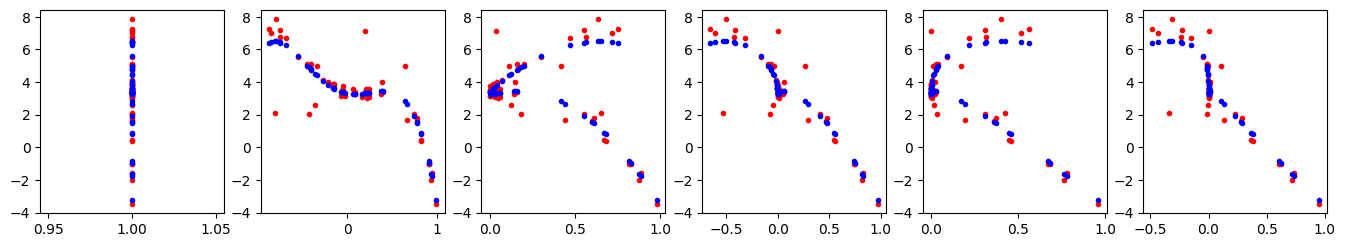

In [ ]:
# Plot results

import matplotlib.pyplot as plt
plt.figure(figsize=(28, 28))
for i in range(6):
  plt.subplot(9, 10, i+1)
  plt.scatter(X_test[:,i],Y_test, color = 'red', marker = '.')
  plt.scatter(X_test[:,i],y_test_predicted, color = 'blue', marker = '.')